In [1]:
from jenn import JENN
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Tutorial 1: One-Dimensional Sinusoid

In a first step, let's define the test function we will be working with, taken to be a simple sinusoidal function:

In [2]:
f = lambda x: x * np.sin(x)
df_dx = lambda x: np.sin(x) + x * np.cos(x)

Next, let's define the domain over which we will collect synthetic training data:

In [3]:
lb = -np.pi
ub = np.pi

We will now generate some synthetic data that will be used to train our GENN model later on:

In [45]:
m = 100_000    # number of training examples
n_x = 1  # number of inputs
n_y = 1  # number of outputs
X_train = np.linspace(lb, ub, m).reshape((m, n_x))
Y_train = f(X_train).reshape((m, n_y))
J_train = df_dx(X_train).reshape((m, n_y, n_x))

We also generate some synthetic data that will be used to test the accuracy of the trained model:

In [46]:
m = 30  # number of test examples
X_test = lb + np.random.rand(m, 1).reshape((m, n_x)) * (ub - lb)
Y_test = f(X_test).reshape((m, n_y))
J_test = df_dx(X_test).reshape((m, n_y, n_x))

We now initalize the model, where $deep \ge 1$ and $wide \ge 1$ are the number of layers in the neural network and the number of nodes per layer, respectively. Feel free to try different network architectures. The parameters $n_x \ge 1$ and $n_y \ge 1$ are the number of inputs and outputs, respectively. 

In [47]:
model = JENN(hidden_layer_sizes=(12,), activation='tanh',
             num_epochs=1, max_iter=200, batch_size=None,
             learning_rate='backtracking', random_state=None, tol=1e-12,
             learning_rate_init=0.05, alpha=0, gamma=0,
             verbose=False)

Now that the model is initialized, we need to train it. To do so, we need to provide training data and specify hyper-parameters that control the behavior of the training algorithm:

In [48]:
%%timeit 
model.fit(X_train, Y_train, J_train) 

1min ± 599 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Now that the model is trained, let's check the results. To do so, we first verify the convergence history: 

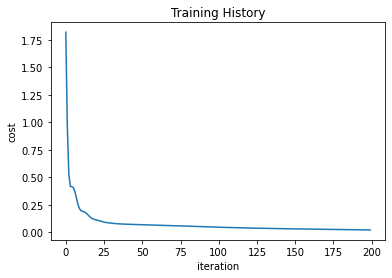

In [40]:
history = model.training_history()

Upon satisfaction, we now check the goodness of fit using the test data we generated earlier: 

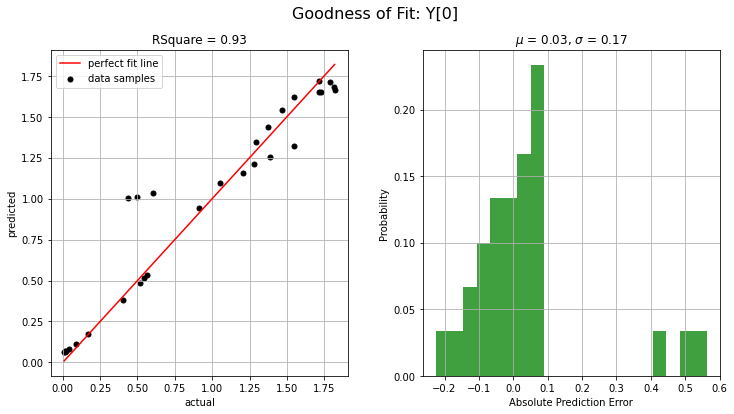

[<Figure size 864x432 with 2 Axes>]

In [41]:
model.goodness_fit(X_test, Y_test)

Finally, since this is a 1D problem, we can plot the predicted and true responses for comparison. In a first step, let's generate new data points for plotting:

In [42]:
X = np.linspace(lb, ub, 100).reshape((-1, n_x))

Second, let's evaluate the true and predicted model at these points:

In [43]:
Y_true = f(X)
Y_pred = model.predict(X)

Finally, we can now plot the true and predicted models for comparison: 

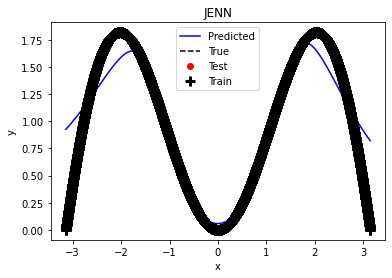

In [44]:
fig, ax = plt.subplots()
ax.plot(X, Y_pred, 'b-')
ax.plot(X, Y_true, 'k--')
ax.plot(X_test, Y_test, 'ro')
ax.plot(X_train, Y_train, 'k+', mew=3, ms=10)
ax.set(xlabel='x', ylabel='y', title='JENN')
ax.legend(['Predicted', 'True', 'Test', 'Train'])
plt.show()

Notice that with only four training points, we obtained a pretty descent prediction. For comparison, let's turn off gradient enhancement (gamma = 0) and repeat these steps: 

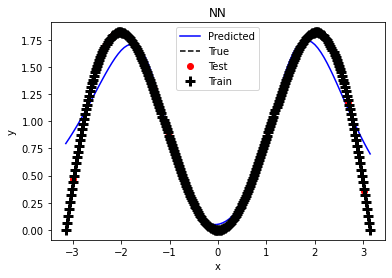

In [13]:
model.gamma = 0 

model.fit(X_train, Y_train) 

Y_true = f(X)
Y_pred = model.predict(X)

fig, ax = plt.subplots()
ax.plot(X, Y_pred, 'b-')
ax.plot(X, Y_true, 'k--')
ax.plot(X_test, Y_test, 'ro')
ax.plot(X_train, Y_train, 'k+', mew=3, ms=10)
ax.set(xlabel='x', ylabel='y', title='NN')
ax.legend(['Predicted', 'True', 'Test', 'Train'])
plt.show()

One can see that even though we nearly perfectly fit the training data, the prediction is actually terrible because, without gradient-enhancement, tradional neural nets need more data points to learn the topology of the response they are trying to fit. 